In [224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split

# Load Data

In [225]:
df = pd.read_csv('dados/dataset.csv')
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Employee Source,AgeStartedWorking
0,41,Voluntary Resignation,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,3,...,0,8,0,1,6,4,0,5,Referral,33
1,37,Voluntary Resignation,Travel_Rarely,Human Resources,6,4,Human Resources,1,Female,3,...,0,8,0,1,6,4,0,5,Referral,29
2,41,Voluntary Resignation,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,3,...,0,8,0,1,6,4,0,5,Referral,33
3,37,Voluntary Resignation,Travel_Rarely,Human Resources,6,4,Marketing,1,Female,3,...,0,8,0,1,6,4,0,5,Referral,29
4,37,Voluntary Resignation,Travel_Rarely,Human Resources,6,4,Human Resources,1,Female,3,...,0,8,0,1,6,4,0,5,Referral,29


# Data Munging

In [226]:
# correcting types
df[['Education','EnvironmentSatisfaction','JobInvolvement','JobLevel',
    'JobSatisfaction','PerformanceRating','RelationshipSatisfaction',
    'StockOptionLevel','WorkLifeBalance']] = df[['Education','EnvironmentSatisfaction',
                                                 'JobInvolvement','JobLevel','JobSatisfaction',
                                                 'PerformanceRating','RelationshipSatisfaction',
                                                 'StockOptionLevel','WorkLifeBalance']].astype(str)

In [227]:
# data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23058 entries, 0 to 23057
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       23058 non-null  int64 
 1   Attrition                 23058 non-null  object
 2   BusinessTravel            23058 non-null  object
 3   Department                23058 non-null  object
 4   DistanceFromHome          23058 non-null  int64 
 5   Education                 23058 non-null  object
 6   EducationField            23058 non-null  object
 7   EnvironmentSatisfaction   23058 non-null  object
 8   Gender                    23058 non-null  object
 9   JobInvolvement            23058 non-null  object
 10  JobLevel                  23058 non-null  object
 11  JobRole                   23058 non-null  object
 12  JobSatisfaction           23058 non-null  object
 13  MaritalStatus             23058 non-null  object
 14  MonthlyIncome         

In [228]:
# statistic summary
df.describe()

,Age,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,AgeStartedWorking
count,23058.000000,23058.000000,23058.000000,23058.000000,23058.000000,23058.000000,23058.000000,23058.000000,23058.000000,23058.000000,23058.000000,23058.000000
mean,37.035562,9.215413,6415.708561,2.690693,15.215630,11.074941,2.804016,6.910053,4.200755,2.164238,4.091335,25.960621
std,9.050759,8.106362,4627.871795,2.499755,3.658836,7.565958,1.289432,5.969888,3.609138,3.200890,3.548117,9.384428
min,18.000000,1.000000,1009.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2900.250000,1.000000,12.000000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000,20.000000
50%,36.000000,7.000000,4898.000000,2.000000,14.000000,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000,25.000000
75%,43.000000,14.000000,8120.000000,4.000000,18.000000,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000,31.000000
max,60.000000,29.000000,19999.000000,9.000000,25.000000,40.000000,6.000000,40.000000,18.000000,15.000000,17.000000,60.000000


In [229]:
# create new metric
df['PriorYearsOfExperience'] = df['TotalWorkingYears'] - df['YearsAtCompany']

In [230]:
# create new metric
df['AverageTenure'] = df['PriorYearsOfExperience'] / df['NumCompaniesWorked']
df['AverageTenure'] = df['AverageTenure'].replace(np.inf, 0)

In [231]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

cols = ['Department','Employee Source','JobRole','MaritalStatus','Gender','Education','EducationField']
df_copy = df.copy()

for col in cols:
    label = LabelEncoder().fit_transform(df_copy[col])
    encoder = OneHotEncoder(sparse=False).fit_transform(label.reshape(-1, 1))
    df_copy.drop(col, axis=1, inplace=True)
    for i in range(len(encoder[0])):
        df_copy[col+'_'+str(i)] = encoder[:,i]
        
df_copy['Attrition'] = LabelEncoder().fit_transform(df_copy['Attrition'])

# Data Split

In [232]:
df_termination = df[df['Attrition'] == 'Termination']

In [233]:
df_voluntary = df[df['Attrition'] == 'Voluntary Resignation']

In [234]:
df_employee = df[df['Attrition'] == 'Current employee']

# Exploratory Data Analysis

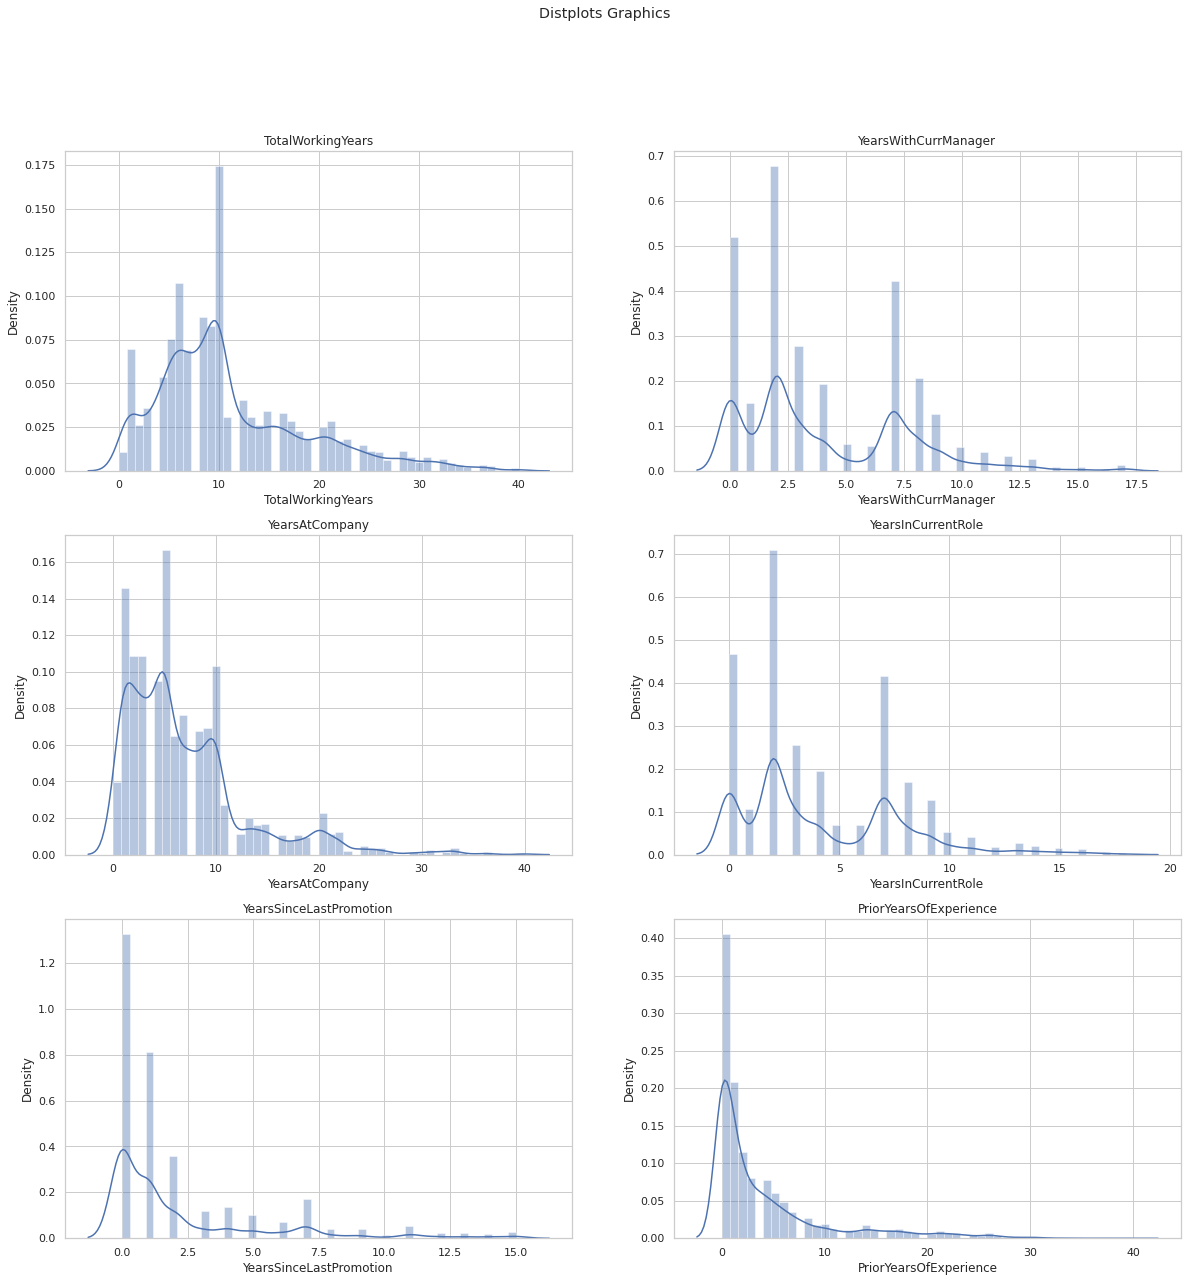

In [235]:
fig, axs = plt.subplots(3, 2, figsize=(20,20))
fig.suptitle('Distplots Graphics')

sns.distplot(df['TotalWorkingYears'], ax=axs[0,0])
axs[0,0].set_title("TotalWorkingYears")
sns.distplot(df['YearsAtCompany'], ax=axs[1,0])
axs[1,0].set_title("YearsAtCompany")
sns.distplot(df['YearsSinceLastPromotion'], ax=axs[2,0])
axs[2,0].set_title("YearsSinceLastPromotion")
sns.distplot(df['YearsWithCurrManager'], ax=axs[0,1])
axs[0,1].set_title("YearsWithCurrManager")
sns.distplot(df['YearsInCurrentRole'], ax=axs[1,1])
axs[1,1].set_title("YearsInCurrentRole")
sns.distplot(df['PriorYearsOfExperience'], ax=axs[2,1])
axs[2,1].set_title("PriorYearsOfExperience")

plt.show()

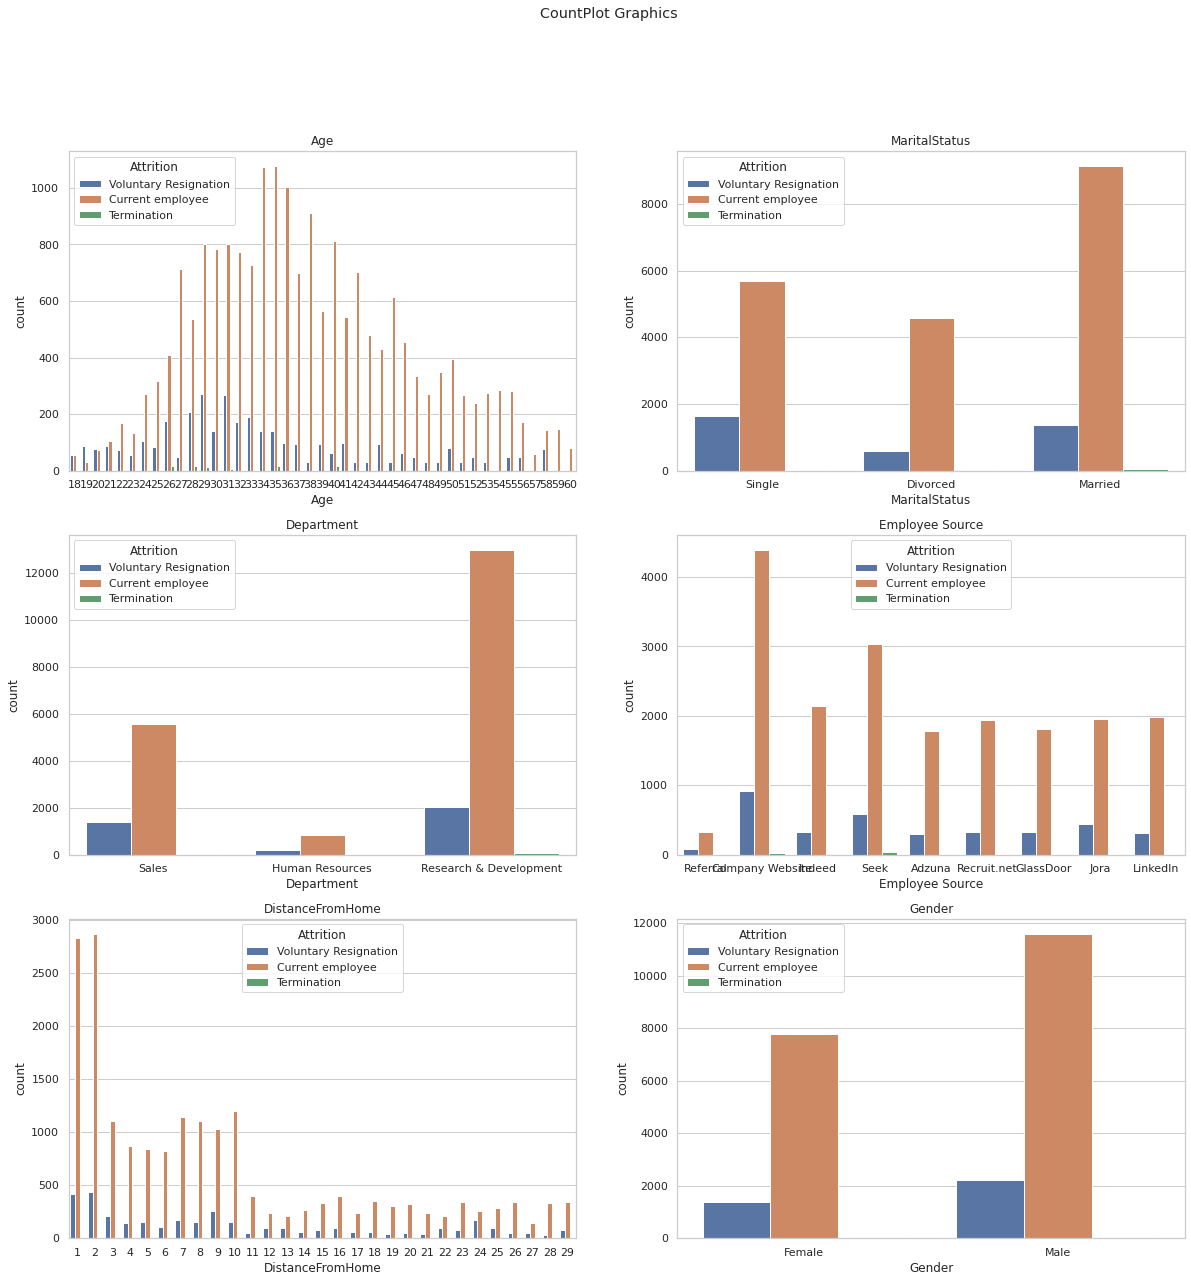

In [236]:
fig, axs = plt.subplots(3, 2, figsize=(20,20))
fig.suptitle('CountPlot Graphics')

sns.countplot(ax=axs[0,0], x='Age', hue='Attrition', data=df)
axs[0,0].set_title("Age")
sns.countplot(ax=axs[1,0], x='Department', hue='Attrition', data=df)
axs[1,0].set_title("Department")
sns.countplot(ax=axs[2,0], x='DistanceFromHome', hue='Attrition', data=df)
axs[2,0].set_title("DistanceFromHome")
sns.countplot(ax=axs[0,1], x='MaritalStatus', hue='Attrition', data=df)
axs[0,1].set_title("MaritalStatus")
sns.countplot(ax=axs[1,1], x='Employee Source', hue='Attrition', data=df)
axs[1,1].set_title("Employee Source")
sns.countplot(ax=axs[2,1], x='Gender', hue='Attrition', data=df)
axs[2,1].set_title("Gender")

plt.show()

## Insights 1

In [237]:
years, dic = [1,3,5,7,10], {}

for year in years:
    dic[year] = np.round(df[df['PriorYearsOfExperience'] < year].shape[0] / df['PriorYearsOfExperience'].shape[0],4)
pd.DataFrame(dic, index=[0]).add_prefix("-").add_suffix("Years")

,-1Years,-3Years,-5Years,-7Years,-10Years
0,0.3247,0.5828,0.7085,0.7952,0.859


Com base na tabela, vemos que 58% dos funcionários têm menos de 3 anos de experiência de trabalho antes de entrar na IBM.

Problemas: novatos, conjuntos de habilidades subdesenvolvidos, base de jovens funcionários, mentalidade de "trabalho" imatura.

## Insights 2

In [238]:
df[df['Age'] < 30].shape[0] / df['Age'].shape[0]

0.2165408968687657

Apenas 22% dos funcionários têm menos de 30 anos.

Problemas: A base de funcionários não é exatamente tão jovem como haviasse pensado no Insight 1. Porque?

Conclusão parcial: a base de funcionários não é muito jovem (+ de 75% tem + de 30 anos) porém a maioria dos funcionários (58%) possuem menos de 3 anos de experiência antes de entrar.

## Inisghts 3

In [239]:
bachelor = np.round(df[df['Education'] == '3'].shape[0] / df['Education'].shape[0],3)
master = np.round(df[df['Education'] == '4'].shape[0] / df['Education'].shape[0],3)
doctor = np.round(df[df['Education'] == '5'].shape[0] / df['Education'].shape[0],3)
print(f"Bachelor: {bachelor}")
print(f"Master: {master}")
print(f"Doctor: {doctor}")

Bachelor: 0.387
Master: 0.272
Doctor: 0.033


Cerca de 39% dos funcionários são graduados e 27% realizaram o mestrado.

Conclusão parcial: a busca pelo ensino superior pode ter levado a uma diminuição da experiência de trabalho, uma vez que esses funcionários passaram anos apenas estudando.

Conslusão Final: o fato da base de funcionário não ser tão jovem e ao mesmo tempo não ter muitos anos de experiência é causado pois os funcionário costumam gastar mais anos estudando, se especializando.

## Insights 4

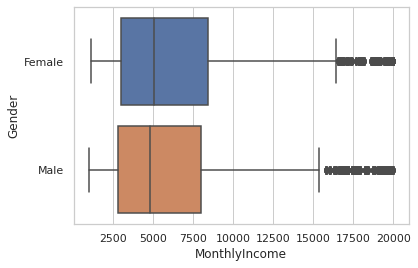

In [240]:
sns.set_theme(style="whitegrid")
sns.boxplot(x='MonthlyIncome', y='Gender', data=df,orient="h")

Não há sinais de discriminação de gênero; na verdade, as mulheres ganham um pouco mais, em média, desconsiderando todos os outros fatores.

## Insights 5

<Figure size 2160x2160 with 0 Axes>

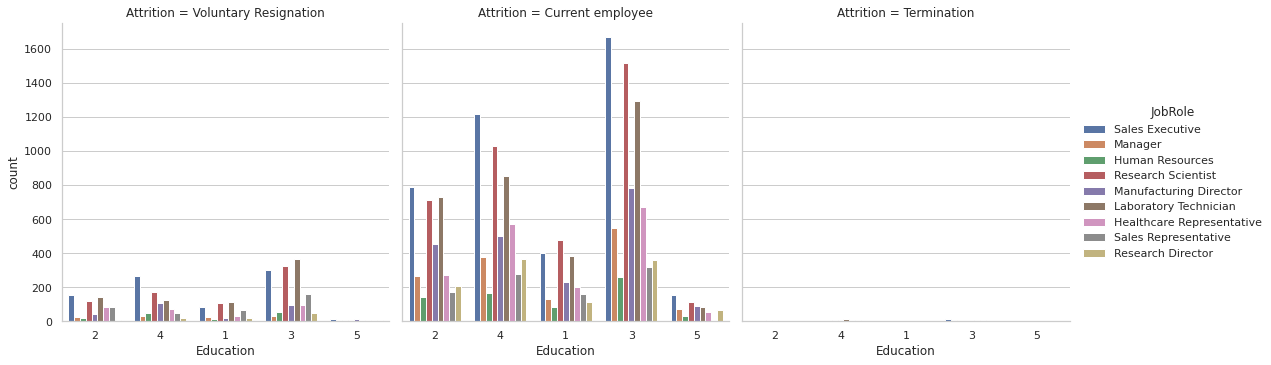

In [241]:
plt.figure(figsize=(30,30))
sns.set_theme(style="whitegrid")
sns.catplot(x='Education', hue='JobRole', col='Attrition', data=df, kind='count')
plt.show()

<Figure size 2160x2160 with 0 Axes>

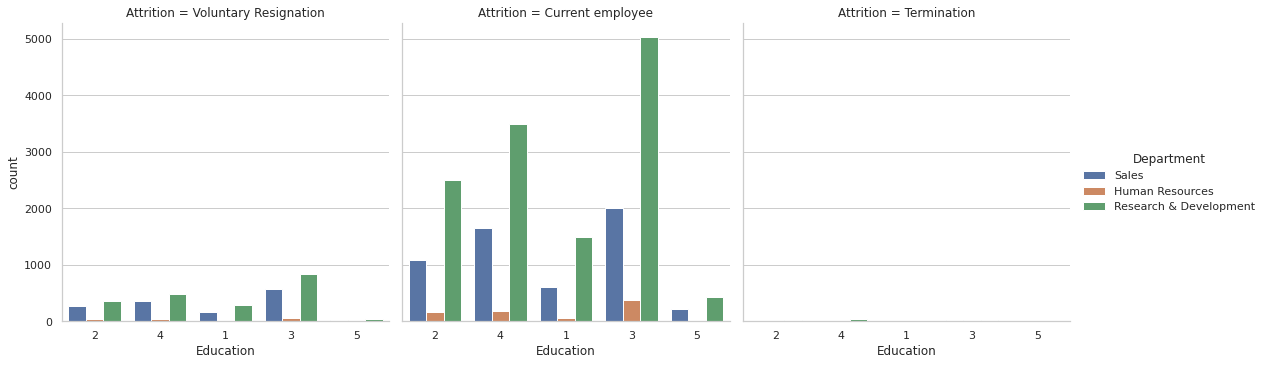

In [242]:
plt.figure(figsize=(30,30))
sns.set_theme(style="whitegrid")
sns.catplot(x='Education', hue='Department', col='Attrition', data=df, kind='count')
plt.show()

Percebemos uma grande quantidade de funcionários trabalhando na Reasearch & Development, o que ajuda a justificar a conclusão no insight 3.

## Best Features

In [243]:
#features
feat_model_01 = ['Age','Department','DistanceFromHome','Employee Source','JobRole','MaritalStatus',
                 'PriorYearsOfExperience','Gender','Education','EducationField']
feat_model_02 = ['Age','Department','DistanceFromHome','Employee Source','JobRole',
                 'MaritalStatus','PriorYearsOfExperience','Gender']
feat_model_03 = ['Age','DistanceFromHome','Employee Source','MaritalStatus',
                 'PriorYearsOfExperience','Gender','Education']
feat_model_04 = ['Department','DistanceFromHome','Employee Source','JobRole',
                 'MaritalStatus','PriorYearsOfExperience','EducationField']
#target
y = ['Attrition']

#data base
df_without_termination = df_copy[df_copy['Attrition'] != 'Termination']
df_employee = df_copy[df_copy['Attrition'] != 'Current employee']
df_all = df_copy.copy()

In [252]:
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_classif
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_log_error

def metrics(y_test, y_pred):
    rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
    rmsle = (np.sqrt(mean_squared_log_error(y_test, y_pred)))
    mae = mean_absolute_error(y_test, y_pred)
    medae = median_absolute_error(y_test, y_pred)
    
    return {'rmse': rmse, 'rmsle': rmsle, 'mae': mae, 'medae': medae}

def select_k_best(X_train, X_test, y_train, y_test, metric):
    k_vs_score = []

    for k in range(2,X_train.shape[1]+1,2):
        selector = SelectKBest(score_func=f_classif, k=k) 

        Xtrain = selector.fit_transform(X_train, y_train)
        Xval = selector.transform(X_test)

        mdl = Lasso(normalize=True)
        mdl.fit(Xtrain, y_train)
        y_pred = mdl.predict(Xval)

        errors = metrics(y_test,y_pred)
        errors['k'] = k

        print(f'Metrics: {errors}')

        k_vs_score.append(errors)

    k_errors = pd.DataFrame(k_vs_score)
    k_errors.set_index('k', inplace = True)
    
    # plotar os gráficos
    k_errors.iloc[:,:-1].plot(figsize=(10,7))
    
    # get best k
    k_errors.sort_values(by=[metric], axis=0, ascending=False, inplace=True)
    best_k = k_errors.index[0]

    # treina com o melhor k e pega o nome das colunas
    selector = SelectKBest(score_func=f_classif, k=best_k)
    selector.fit(X_train, y_train)
    inpvar_selected_columns = X_train.iloc[:, selector.get_support()].columns

    print(f'Best features: {inpvar_selected_columns}\n')

In [253]:
def run():
    print('Which metic:\n\t1 - RMSE\n\t2 - RMSLE\n\t3 - MAE\n\tOther - MEDAE')
    choice_m = int(input("Choice: "))
    if choice_m == 1:
        metric = 'rmse'
    elif choice_m == 2:
        metric = 'rmsle'
    elif choice_m == 2:
        metric = 'mae'
    else:
        metric = 'medae'
    
    print('Which dataset:\n\t1 - Whitout termination status\n\t2 - Just whit employee\n\tOther - All data')
    choice_db = int(input("Choice: "))
    if choice_db == 1:
        df_temp = df_without_termination
    elif choice_db == 2:
        df_temp  = df_employee
    else:
        df_temp  = df_all
        
    sep = ' - '
    print(f"Which feature:\n\t1 - {sep.join(feat_model_01)}\n\t2 - {sep.join(feat_model_01)}")
    print(f"\t3 - {sep.join(feat_model_03)}\n\tOther - {sep.join(feat_model_04)}")
    choice_feat = int(input("Choice: "))

    if choice_feat == 1:
        X = df_temp[['Age','DistanceFromHome','Department_0','Department_1','Department_2',
                'Employee Source_0','Employee Source_1', 'Employee Source_2', 'Employee Source_3',
                'Employee Source_4', 'Employee Source_5', 'Employee Source_6',
                'Employee Source_7', 'Employee Source_8', 'JobRole_0', 'JobRole_1',
                'JobRole_2', 'JobRole_3', 'JobRole_4', 'JobRole_5', 'JobRole_6',
                'JobRole_7', 'JobRole_8', 'MaritalStatus_0', 'MaritalStatus_1',
                'MaritalStatus_2', 'Gender_0', 'Gender_1', 'Education_0', 'Education_1',
                'Education_2', 'Education_3', 'Education_4', 'EducationField_0',
                'EducationField_1', 'EducationField_2', 'EducationField_3',
                'EducationField_4', 'EducationField_5','PriorYearsOfExperience']]
        y = df_temp[['Attrition']]
    elif choice_feat == 2:
        X = df_temp[['Age','Department_0','Department_1','Department_2','DistanceFromHome',
                'Employee Source_0','Employee Source_1', 'Employee Source_2', 'Employee Source_3',
                'Employee Source_4', 'Employee Source_5', 'Employee Source_6',
                'Employee Source_7', 'Employee Source_8', 'JobRole_0', 'JobRole_1',
                'JobRole_2', 'JobRole_3', 'JobRole_4', 'JobRole_5', 'JobRole_6',
                'JobRole_7', 'JobRole_8', 'MaritalStatus_0', 'MaritalStatus_1',
                'MaritalStatus_2', 'Gender_0', 'Gender_1','PriorYearsOfExperience']]
        y = df_temp[['Attrition']]
    elif choice_feat == 3:
        X = df_temp[['Age','DistanceFromHome','MaritalStatus_0', 'MaritalStatus_1','Employee Source_8',
                'Employee Source_0', 'Employee Source_1', 'Employee Source_2', 'Employee Source_3',
                'Employee Source_4', 'Employee Source_5', 'Employee Source_6','Employee Source_7', 
                'Education_0', 'Education_1', 'Education_2', 'Education_3', 'Education_4',
                'PriorYearsOfExperience','Gender_0','Gender_1']]
        y = df_temp[['Attrition']]
    else:
        X = df_temp[['Department_0','Department_1', 'Department_2','DistanceFromHome',
                'Employee Source_0', 'Employee Source_1', 'Employee Source_2', 'Employee Source_3',
                'Employee Source_4', 'Employee Source_5', 'Employee Source_6','Employee Source_7', 
                'Employee Source_8','JobRole_0', 'JobRole_1', 'JobRole_2', 'JobRole_3', 'JobRole_4', 
                'JobRole_5', 'JobRole_6', 'JobRole_7', 'JobRole_8', 'MaritalStatus_0', 'MaritalStatus_1',
                'MaritalStatus_2','PriorYearsOfExperience','EducationField_0','EducationField_1', 
                'EducationField_2', 'EducationField_3', 'EducationField_4', 'EducationField_5']]
        y = df_temp[['Attrition']]
        
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
    select_k_best(X_train, X_test, y_train, y_test, metric)

Which metic:
	1 - RMSE
	2 - RMSLE
	3 - MAE
	Other - MEDAE


Choice:  2


Which dataset:
	1 - Whitout termination status
	2 - Just whit employee
	Other - All data


Choice:  2


Which feature:
	1 - Age - Department - DistanceFromHome - Employee Source - JobRole - MaritalStatus - PriorYearsOfExperience - Gender - Education - EducationField
	2 - Age - Department - DistanceFromHome - Employee Source - JobRole - MaritalStatus - PriorYearsOfExperience - Gender - Education - EducationField
	3 - Age - DistanceFromHome - Employee Source - MaritalStatus - PriorYearsOfExperience - Gender - Education
	Other - Department - DistanceFromHome - Employee Source - JobRole - MaritalStatus - PriorYearsOfExperience - EducationField


Choice:  3


(15448, 21)
Metrics: {'rmse': 0.7352102144517978, 'rmsle': 0.41479859038128597, 'mae': 0.5341545814162862, 'medae': 0.31162610046607975, 'k': 2}
Metrics: {'rmse': 0.7352102144517978, 'rmsle': 0.41479859038128597, 'mae': 0.5341545814162862, 'medae': 0.31162610046607975, 'k': 4}
Metrics: {'rmse': 0.7352102144517978, 'rmsle': 0.41479859038128597, 'mae': 0.5341545814162862, 'medae': 0.31162610046607975, 'k': 6}
Metrics: {'rmse': 0.7352102144517978, 'rmsle': 0.41479859038128597, 'mae': 0.5341545814162862, 'medae': 0.31162610046607975, 'k': 8}
Metrics: {'rmse': 0.7352102144517978, 'rmsle': 0.41479859038128597, 'mae': 0.5341545814162862, 'medae': 0.31162610046607975, 'k': 10}
Metrics: {'rmse': 0.7352102144517978, 'rmsle': 0.41479859038128597, 'mae': 0.5341545814162862, 'medae': 0.31162610046607975, 'k': 12}
Metrics: {'rmse': 0.7352102144517978, 'rmsle': 0.41479859038128597, 'mae': 0.5341545814162862, 'medae': 0.31162610046607975, 'k': 14}
Metrics: {'rmse': 0.7352102144517978, 'rmsle': 0.41479

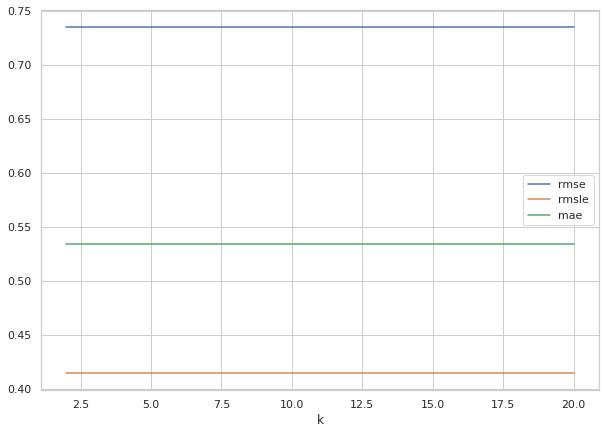

In [258]:
run()